In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
# provider = IBMQ.get_provider("ibm-q")
provider = IBMQ.get_provider(hub='ibm-q-education', group='yale-uni-2', project='cpsc647-quantum')
# device = provider.get_backend('ibmq_lima') #run on ibmq_lima (5-qbit QC)

In [2]:
device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem', 'ibmq_casablanca', 'ibmq_jakarta', 'ibm_lagos', 'ibm_perth'  ]
# device_names =  ['ibmq_lima', 'ibmq_bogota', 'ibmq_santiago', 'ibmq_manila', 'ibmq_quito', 'ibmq_belem']
device = [0]*len(device_names)
for i in range(len(device_names)):
    device[i] = provider.get_backend(device_names[i])
    print("Device", i , "=", device[i])


Device 0 = ibmq_lima
Device 1 = ibmq_bogota
Device 2 = ibmq_santiago
Device 3 = ibmq_manila
Device 4 = ibmq_quito
Device 5 = ibmq_belem
Device 6 = ibmq_casablanca
Device 7 = ibmq_jakarta
Device 8 = ibm_lagos
Device 9 = ibm_perth


In [20]:
qnn_circuit = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    creg c[2];
    ry(10000) q[0];
    ry(10000) q[1];
    rz(10000) q[0];
    rz(10000) q[1];
    rx(10000) q[0];
    rx(10000) q[1];
    ry(10000) q[0];
    ry(10000) q[1];
    rz(10000) q[0];
    rz(10000) q[1];
    rx(10000) q[0];
    rx(10000) q[1];
    ry(10000) q[0];
    ry(10000) q[1];
    rz(10000) q[0];
    rz(10000) q[1];
    rz(-1.3310241) q[0];
    rx(0.83103383) q[1];
    cx q[0],q[1];
    cx q[0],q[1];
    ry(-2.4785862) q[0];
    rx(2.5715125) q[1];
    rz(-0.70042634) q[0];
    rz(-2.2663293) q[0];
    ry(-2.4792454) q[1];
    ry(0.0023221225) q[0];
    ry(-2.2955015) q[1];
    rx(2.9165242) q[0];
    ry(0.66973358) q[1];
    ry(0.005372412) q[1];
    rx(1.3435249) q[0];
    cx q[0],q[1];
    ry(2.283391) q[0];
    rx(1.0491163) q[0];
    rz(1.8316151) q[1];
    ry(-3.2603636) q[0];
    rx(-0.23841791) q[0];
    rx(1.8357133) q[1];
    ry(-1.292376) q[1];
    rz(0.17148297) q[1];
    rz(0.2812238) q[0];
    rx(0.07749293) q[0];
    ry(1.5449409) q[1];
    rz(-2.7121313) q[1];
    ry(1.5562814) q[0];
    rx(-0.31975257) q[1];
    cx q[0],q[1];
    rx(2.147378) q[1];
    rz(1.8285946) q[1];
    rx(3.073314) q[1];
    rz(2.9738009) q[0];
    cx q[0],q[1];
    cx q[0],q[1];
    rx(-0.40871969) q[1];
    rx(0.44564658) q[0];
    ry(0.75953311) q[1];
    rx(-2.7619956) q[0];
    cx q[1],q[0];
    cx q[1],q[0];
    ry(0.89505833) q[0];
    rz(-1.2570173) q[1];
    rx(0.61854398) q[0];
    rx(-3.1436832) q[0];
    ry(2.573169) q[0];
    rx(2.6208837) q[0];
    cx q[0],q[1];
    rx(1.7770391) q[0];
    ry(1.5732167) q[1];
    rz(-0.28396741) q[1];
    crx(-0.36527842) q[0],q[1];
    h q[0];
    sx q[1];
    cx q[1],q[0];
"""

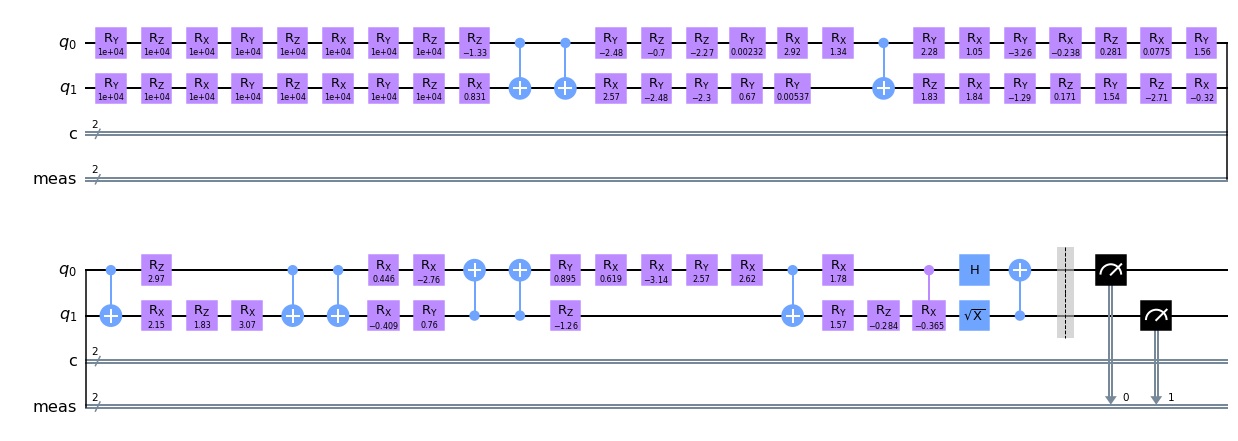

In [32]:
circ = QuantumCircuit.from_qasm_str(qnn_circuit)
circ.measure_all()
circ.draw('mpl')

In [ ]:
# ry(param0) q[0];
# ry(param1) q[1];
# rz(param2) q[0];
# rz(param3) q[1];
# rx(param4) q[0];
# rx(param5) q[1];
# ry(param6) q[0];
# ry(param7) q[1];
# rz(param8) q[0];
# rz(param9) q[1];
# rx(param10) q[0];
# rx(param11) q[1];
# ry(param12) q[0];
# ry(param13) q[1];
# rz(param14) q[0];
# rz(param15) q[1];

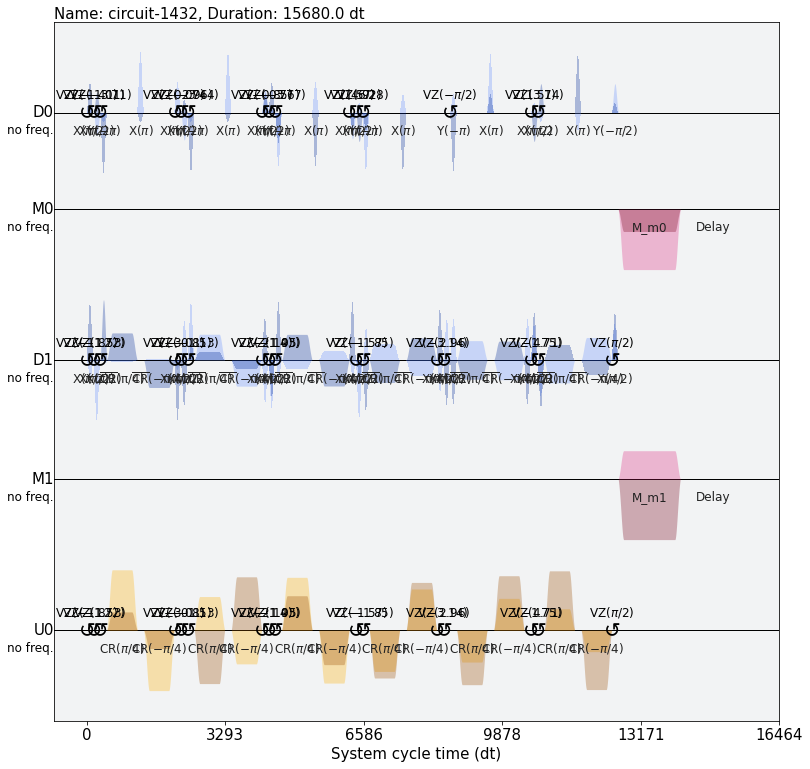

In [43]:
from qiskit import transpile, schedule as build_schedule

backend = device[9]

transpiled_circ = transpile(circ, backend) 
schedule = build_schedule(transpiled_circ, backend)
schedule.draw()

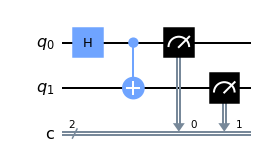

In [8]:
from qiskit import QuantumCircuit

qasm_str = """
    OPENQASM 2.0;
    include "qelib1.inc";
    qreg q[2];
    creg c[2];
    h q[0];
    cx q[0],q[1];
    measure q[0] -> c[0];
    measure q[1] -> c[1];
"""

circ = QuantumCircuit.from_qasm_str(qasm_str)
circ.draw('mpl')